### S05 T01: Transformació Registre Log amb Regular expressions - Eduardo Baffi

### - Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com"
que trobaràs al repositori de GitHub "Data-sources".

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [140]:
# Leer archivo text
log_df = pd.read_csv('C:\\Users\\eduba\\Documents\\Notebooks\\Web_access_log-akumenius.com.txt',sep=' ', header=None, error_bad_lines=False, warn_bad_lines=False, engine='python')
log_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [141]:
log_df.shape

(261871, 12)

In [142]:
log_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,-,-,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
...,...,...,...,...,...,...,...,...,...,...,...,...
261866,www.akumenius.com,5.255.253.53,-,-,[02/Mar/2014:03:05:39,+0100],GET / HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,VLOG=-
261867,www.akumenius.com,74.86.158.107,-,-,[02/Mar/2014:03:09:52,+0100],HEAD / HTTP/1.1,200,-,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http...,VLOG=-
261868,localhost,127.0.0.1,-,-,[02/Mar/2014:03:10:18,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-
261869,localhost,127.0.0.1,-,-,[02/Mar/2014:03:10:18,+0100],OPTIONS * HTTP/1.0,200,-,-,Apache (internal dummy connection),VLOG=-


In [4]:
# Primera limpieza - Excluir columns que no interesan para este ejercício
test_df = log_df.iloc[:3000,[0,1,4,5,6,7,8,10,11]]
test_df

,0,1,4,5,6,7,8,10,11
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
...,...,...,...,...,...,...,...,...,...
2995,www.akumenius.com,157.55.35.112,[23/Feb/2014:04:25:27,+0100],GET /destinos-baratos/destinosEstrelles/hotele...,200,8820,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,VLOG=-
2996,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:29,+0100],GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
2997,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:36,+0100],GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
2998,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:44,+0100],GET /hoteles-baratos/ofertas-hotel-Napa-Winery...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-


In [5]:
# Estandariza e identificación de los campos del log file
test_df.columns = ['host','IP','date','zone','request','status','ret_size','browser','VLOG']
test_df

,host,IP,date,zone,request,status,ret_size,browser,VLOG
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-
...,...,...,...,...,...,...,...,...,...
2995,www.akumenius.com,157.55.35.112,[23/Feb/2014:04:25:27,+0100],GET /destinos-baratos/destinosEstrelles/hotele...,200,8820,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,VLOG=-
2996,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:29,+0100],GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
2997,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:36,+0100],GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-
2998,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:44,+0100],GET /hoteles-baratos/ofertas-hotel-Napa-Winery...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-


In [143]:
test_df.host.value_counts()

www.akumenius.com    2976
localhost              24
Name: host, dtype: int64

In [144]:
test_df.status.value_counts()

200    2175
404     815
304       8
502       2
Name: status, dtype: int64

#### Atributos
La base de datos tiene la información de archivos log (log files) de la atividade de todas las visitas realizadas a la página web de l'agència de viatges "akumenius.com". La base de datos tiene 3000 líneas/registros

Los atributos relevantes identificados está divididos en las columans del dataset "test_df:

'host': página visitada. Casi todas las líneas, 2974, registron visitas a la página "akumenius.com". Hay algunos pocos, 24, registros de acceso local ("localhost" con IP 127.0.0.1) que no serán importantas para esta análise. 

'IP': La dirección IP ("Internet Protocol") del solicitante.
'date': Dia y hora de la consulta.
'zone': Zona horária de la hora de la consulta que está en el log file.
'request': línea de solicitud del cliente, que contiene informaciones relevantes, como el método usado por el cliente y otras.
'status': Status de la solicitud. Los códigos encontrados en el data set son:
          200 - OK: indica que la solicitud ha sido procesada correctamente.
          404 - Not Found: significa que no fue posible encontrar los datos de la página web solicitada en el servidor.
          304 - No Modificado: comunica al navegador que los recursos almacenados (en caché) en el navegador no han sido                       modificados desde la última vez que visitó esa página.  
          502 - Bad Gateway: significa que un servidor en Internet recibió una respuesta no válida de otro servidor.      
         
'ret_size': Cantidad de datos transferidos en bytes.
'browser': Información de identificación que el navegador del cliente informa sobre sí mismo.

*Los datos de la columna 'VLOG' no son relevantes para la análise y la columna será excluída el 

### - Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   host      3000 non-null   object
 1   IP        3000 non-null   object
 2   date      3000 non-null   object
 3   zone      3000 non-null   object
 4   request   3000 non-null   object
 5   status    3000 non-null   int64 
 6   ret_size  3000 non-null   object
 7   browser   3000 non-null   object
 8   VLOG      3000 non-null   object
dtypes: int64(1), object(8)
memory usage: 211.1+ KB


In [8]:
test_df[['day','hour']] = test_df.date.str.split(pat=":",n=1, expand=True)

test_df

,host,IP,date,zone,request,status,ret_size,browser,VLOG,day,hour
0,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014,03:10:31
1,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014,03:10:31
2,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014,03:10:31
3,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014,03:10:31
4,localhost,127.0.0.1,[23/Feb/2014:03:10:31,+0100],OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),VLOG=-,[23/Feb/2014,03:10:31
...,...,...,...,...,...,...,...,...,...,...,...
2995,www.akumenius.com,157.55.35.112,[23/Feb/2014:04:25:27,+0100],GET /destinos-baratos/destinosEstrelles/hotele...,200,8820,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,VLOG=-,[23/Feb/2014,04:25:27
2996,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:29,+0100],GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,[23/Feb/2014,04:25:29
2997,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:36,+0100],GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,[23/Feb/2014,04:25:36
2998,www.akumenius.com,66.249.76.216,[23/Feb/2014:04:25:44,+0100],GET /hoteles-baratos/ofertas-hotel-Napa-Winery...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,VLOG=-,[23/Feb/2014,04:25:44


In [9]:
test_df['day'] = test_df['day'].str.replace('\[',"")
test_df['zone'] = test_df['zone'].str.replace('\]',"")
test_df.drop(columns=["date"], inplace = True)

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   host      3000 non-null   object
 1   IP        3000 non-null   object
 2   zone      3000 non-null   object
 3   request   3000 non-null   object
 4   status    3000 non-null   int64 
 5   ret_size  3000 non-null   object
 6   browser   3000 non-null   object
 7   VLOG      3000 non-null   object
 8   day       3000 non-null   object
 9   hour      3000 non-null   object
dtypes: int64(1), object(9)
memory usage: 234.5+ KB


In [11]:
test_df.isnull().sum()

host        0
IP          0
zone        0
request     0
status      0
ret_size    0
browser     0
VLOG        0
day         0
hour        0
dtype: int64

In [12]:
test_df = test_df[["day","hour","zone","host","IP","request","status","ret_size","browser"]]
test_df

,day,hour,zone,host,IP,request,status,ret_size,browser
0,23/Feb/2014,03:10:31,+0100,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
1,23/Feb/2014,03:10:31,+0100,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
2,23/Feb/2014,03:10:31,+0100,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
3,23/Feb/2014,03:10:31,+0100,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
4,23/Feb/2014,03:10:31,+0100,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...
2995,23/Feb/2014,04:25:27,+0100,www.akumenius.com,157.55.35.112,GET /destinos-baratos/destinosEstrelles/hotele...,200,8820,Mozilla/5.0 (compatible; bingbot/2.0; +http://...
2996,23/Feb/2014,04:25:29,+0100,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
2997,23/Feb/2014,04:25:36,+0100,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...
2998,23/Feb/2014,04:25:44,+0100,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Napa-Winery...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...


In [63]:
test_df['zone'].value_counts()

+0100    3000
Name: zone, dtype: int64

In [75]:
test_df['zone'] = test_df['zone'].str[:-2]
test_df.head()

,day,hour,zone,host,IP,request,status,ret_size,browser
0,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
1,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
2,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
3,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
4,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)


In [77]:
test_df['zone'].value_counts()

+01    3000
Name: zone, dtype: int64

In [78]:
test_df['IP'].value_counts()

66.249.76.216      2040
162.243.192.191     494
157.55.33.97         43
157.55.35.112        30
157.55.32.183        25
                   ... 
180.76.6.159          1
180.76.6.45           1
180.76.5.190          1
180.76.5.177          1
180.76.6.62           1
Name: IP, Length: 148, dtype: int64

In [79]:
# Dataset principal exportado .csv
test_df.to_csv('Weblogfiles.csv')

### - Exercici 3
Geolocalitza les IP's.

In [81]:
# Para que los resultados sean más rápido, un pequeño subset del Dataset fue generado para que hacer los tests 

mini = test_df[:30]
mini

,day,hour,zone,host,IP,request,status,ret_size,browser
0,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
1,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
2,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
3,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
4,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
5,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
6,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
7,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
8,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)
9,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection)


In [82]:
# API para filtar los IP's que son públicos
from IPy import IP
IP('66.249.76.216').iptype()

'PUBLIC'

In [99]:
from IPy import IP

coordinates = []
lat = []
long = []
country = []
country_name = []
region = []
city=[]

for num in mini['IP']:
    if ((num != None)  & (IP(num).iptype() == 'PUBLIC')):
        try:
            handler = ipinfo.getHandler(access_token)#='913964b7139968')
            ip_address = num
            details = handler.getDetails(ip_address)
            #coordinates.append(details.loc)
            #lat.append(details.latitude)
            #long.append(details.longitude)
            #country.append(details.country)
            #country_name.append(details.country_name)
            #region.append(details.region)
            #city.append(details.city)
            
        #except:
        finally:
            coordinates.append(details.loc)
            lat.append(details.latitude)
            long.append(details.longitude)
            country.append(details.country)
            country_name.append(details.country_name)
            region.append(details.region)
            city.append(details.city)
            
            #coordinates.append("not found")
            #lat.append("not found")
            #long.append("not found")
            #country.append("not found")
            #country_name.append("not found")
            #region.append("not found")
            #city.append("not found")
    else:
        coordinates.append("not found")
        lat.append("not found")
        long.append("not found")
        country.append("not found")
        country_name.append("not found")
        region.append("not found")
        city.append("not found")

mini["coordinates"] = coordinates
mini["latitude"] = lat
mini["long"] = long
mini["country"] = country
mini["country_name"] = country_name
mini["region"] = region
mini["city"] = city

In [100]:
mini

,day,hour,zone,host,IP,request,status,ret_size,browser,coordinates,latitude,long,country,country_name,region,city
0,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
1,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
2,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
3,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
4,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
5,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
6,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
7,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
8,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found
9,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,IP null or PRIVATE,not found


In [92]:
mini_test = mini[~(mini.coordinates == "IP null or PRIVATE")]
mini_test

,day,hour,zone,host,IP,request,status,ret_size,browser,coordinates,latitude,long,country,country_name,region,city
22,23/Feb/2014,03:10:31,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
23,23/Feb/2014,03:10:33,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
24,23/Feb/2014,03:10:35,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
25,23/Feb/2014,03:10:38,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Kensington-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
26,23/Feb/2014,03:10:39,+01,www.akumenius.com,66.249.76.216,GET /destinos-baratos/destinosEstrelles/hotele...,200,8811,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
27,23/Feb/2014,03:10:40,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Howard-Jhon...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
28,23/Feb/2014,03:10:42,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Princesa-So...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
29,23/Feb/2014,03:10:45,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Kfar-Giladi...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London


In [85]:
mini2 = mini[22:29]
mini2

,day,hour,zone,host,IP,request,status,ret_size,browser,coordinates,latitude,long,country,country_name,region,city
22,23/Feb/2014,03:10:31,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
23,23/Feb/2014,03:10:33,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
24,23/Feb/2014,03:10:35,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
25,23/Feb/2014,03:10:38,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Kensington-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
26,23/Feb/2014,03:10:39,+01,www.akumenius.com,66.249.76.216,GET /destinos-baratos/destinosEstrelles/hotele...,200,8811,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
27,23/Feb/2014,03:10:40,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Howard-Jhon...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London
28,23/Feb/2014,03:10:42,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Princesa-So...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,England,London


In [120]:
# Teste del plot del mapa con el dataset de pocas líneas

# test mapa
# import the library
#import folium

# Make an empty map
#m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
#for i in range(0,len(mini2)):
   #folium.Marker(
      #location=[mini2.iloc[i]['latitude'], mini2.iloc[i]['long']],
     # popup=mini2.iloc[i]['city'],
   #).add_to(m)

# Show the map
#m

In [89]:
logfiles_df = test_df.copy() #Cópia del Dataset original por seguridad
logfiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       3000 non-null   object
 1   hour      3000 non-null   object
 2   zone      3000 non-null   object
 3   host      3000 non-null   object
 4   IP        3000 non-null   object
 5   request   3000 non-null   object
 6   status    3000 non-null   int64 
 7   ret_size  3000 non-null   object
 8   browser   3000 non-null   object
dtypes: int64(1), object(8)
memory usage: 211.1+ KB


In [103]:
# Geolocalización con todo el Dataset

from IPy import IP

coordinates = []
lat = []
long = []
country = []
country_name = []
region = []
city=[]

for num in logfiles_df['IP']:
    if ((num != None)  & (IP(num).iptype() == 'PUBLIC')):
        try:
            handler = ipinfo.getHandler(access_token) #='913964b7139968')
            ip_address = num
            details = handler.getDetails(ip_address)
        except: 
            coordinates.append("not found")
            lat.append("not found")
            long.append("not found")
            country.append("not found")
            country_name.append("not found")
            city.append("not found")
        finally:
            coordinates.append(details.loc)
            lat.append(details.latitude)
            long.append(details.longitude)
            country.append(details.country)
            country_name.append(details.country_name)
            city.append(details.city)
    else:
        coordinates.append("not found")
        lat.append("not found")
        long.append("not found")
        country.append("not found")
        country_name.append("not found")
        city.append("not found")

logfiles_df["coordinates"] = coordinates
logfiles_df["latitude"] = lat
logfiles_df["long"] = long
logfiles_df["country"] = country
logfiles_df["country_name"] = country_name
logfiles_df["city"] = city

In [107]:
logfiles_df

,day,hour,zone,host,IP,request,status,ret_size,browser,coordinates,latitude,long,country,country_name,city
0,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),not found,not found,not found,not found,not found,not found
1,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),not found,not found,not found,not found,not found,not found
2,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),not found,not found,not found,not found,not found,not found
3,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),not found,not found,not found,not found,not found,not found
4,23/Feb/2014,03:10:31,+01,localhost,127.0.0.1,OPTIONS * HTTP/1.0,200,-,Apache (internal dummy connection),not found,not found,not found,not found,not found,not found
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,23/Feb/2014,04:25:27,+01,www.akumenius.com,157.55.35.112,GET /destinos-baratos/destinosEstrelles/hotele...,200,8820,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,"47.6740,-122.1215",47.6740,-122.1215,US,United States,Redmond
2996,23/Feb/2014,04:25:29,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
2997,23/Feb/2014,04:25:36,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
2998,23/Feb/2014,04:25:44,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Napa-Winery...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London


In [130]:
geolog_df = logfiles_df[~((logfiles_df.latitude == "not found") & (logfiles_df.long == "not found")& (logfiles_df.city == "not found"))]
geolog_df.rename(columns={"long":"longitude"}, inplace=True)
geolog_df

,day,hour,zone,host,IP,request,status,ret_size,browser,coordinates,latitude,longitude,country,country_name,city
22,23/Feb/2014,03:10:31,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
23,23/Feb/2014,03:10:33,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Metropolis-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
24,23/Feb/2014,03:10:35,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Faena-Hotel...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
25,23/Feb/2014,03:10:38,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Kensington-...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
26,23/Feb/2014,03:10:39,+01,www.akumenius.com,66.249.76.216,GET /destinos-baratos/destinosEstrelles/hotele...,200,8811,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,23/Feb/2014,04:25:27,+01,www.akumenius.com,157.55.35.112,GET /destinos-baratos/destinosEstrelles/hotele...,200,8820,Mozilla/5.0 (compatible; bingbot/2.0; +http://...,"47.6740,-122.1215",47.6740,-122.1215,US,United States,Redmond
2996,23/Feb/2014,04:25:29,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
2997,23/Feb/2014,04:25:36,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Holiday-Inn...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London
2998,23/Feb/2014,04:25:44,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Napa-Winery...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London


In [131]:
geolog_df.isnull().sum()

day             0
hour            0
zone            0
host            0
IP              0
request         0
status          0
ret_size        0
browser         0
coordinates     0
latitude        0
longitude       0
country         0
country_name    1
city            0
dtype: int64

In [132]:
new_geolog_df=geolog_df[geolog_df.country_name.notnull()]
new_geolog_df.isnull().sum()

day             0
hour            0
zone            0
host            0
IP              0
request         0
status          0
ret_size        0
browser         0
coordinates     0
latitude        0
longitude       0
country         0
country_name    0
city            0
dtype: int64

### - Nivell 3 - Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

In [307]:
# Geo-Spatial data analysis
# Análise de las ciudades de dónde partiran las consultas a la Web de "akumenius.com" a partir de la geolocalización de los IP`s

# import the library
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# add marker one by one on the map
for i in range(0,len(new_geolog_df)):
   folium.Marker(
      location=[new_geolog_df.iloc[i]['latitude'], new_geolog_df.iloc[i]['longitude']],
      popup=new_geolog_df.iloc[i]['city'],
   ).add_to(m)

# Show the map
m

In [135]:
city_total = new_geolog_df.city.value_counts()
city_total

London              2099
New York City        494
Beijing               94
Redmond               73
Foshan                73
Quincy                56
North Bergen          20
Chicago               15
Moscow                10
Boydton                9
Roubaix                9
Sevilla                7
Ashburn                4
Betzdorf               2
Youngstown             2
Saint Petersburg       2
Tokyo                  1
Mountain View          1
Barcelona              1
Düsseldorf             1
Arequipa               1
Shenzhen               1
Name: city, dtype: int64

In [168]:
totals = new_geolog_df.groupby(['city','latitude','longitude',]).size()
totals_df = totals.to_frame('num_consult').reset_index()
totals_df

,city,latitude,longitude,num_consult
0,Arequipa,-16.3989,-71.5350,1
1,Ashburn,39.0437,-77.4875,4
2,Barcelona,41.3888,2.1590,1
3,Beijing,39.9075,116.3972,94
4,Betzdorf,50.7909,7.8719,2
5,Boydton,36.6676,-78.3875,9
6,Chicago,41.8500,-87.6500,15
7,Düsseldorf,51.2217,6.7762,1
8,Foshan,23.0268,113.1315,73
9,London,51.5085,-0.1257,2099


In [193]:
# Bubble map
# El tamaño del círculo representa el número de consultas que vine de cada ciudad.
# London y New York representan las principales orígenes de las consultas

m = folium.Map(location=[20,0], tiles="Stamen Terrain", zoom_start=2)
# add marker one by one on the map
for i in range(0,len(totals_df)):
   folium.Circle(
      location=[totals_df.iloc[i]['latitude'], totals_df.iloc[i]['longitude']],
      popup=totals_df.iloc[i]['city'],
      radius=float(totals_df.iloc[i]['num_consult'])*500,
      color='red',
      fill=True,
      fill_color='crimson'
   ).add_to(m)

# Show the map 
m

In [217]:
new_geolog_df.head(1)

,day,hour,zone,host,IP,request,status,ret_size,browser,coordinates,latitude,longitude,country,country_name,city
22,23/Feb/2014,03:10:31,+01,www.akumenius.com,66.249.76.216,GET /hoteles-baratos/ofertas-hotel-Club-&-Hote...,404,3100,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,"51.5085,-0.1257",51.5085,-0.1257,GB,United Kingdom,London


In [232]:
countries = new_geolog_df.groupby(['country_name','latitude','longitude']).size()
countries_df = countries.to_frame('total').reset_index()
countries_df

,country_name,latitude,longitude,total
0,China,22.5455,114.0683,1
1,China,23.0268,113.1315,73
2,China,39.9075,116.3972,94
3,France,50.6942,3.1746,9
4,Germany,50.7909,7.8719,2
5,Germany,51.2217,6.7762,1
6,Japan,35.6895,139.6917,1
7,Peru,-16.3989,-71.5350,1
8,Russia,55.7522,37.6156,10
9,Russia,59.9386,30.3141,2


In [239]:
countries_df.columns

Index(['country_name', 'latitude', 'longitude', 'total'], dtype='object')

In [251]:
maps_df = countries_df.copy()

In [293]:
maps_df["latitude"] = countries_df.latitude.astype(float)
maps_df["longitude"] = countries_df.longitude.astype(float)
maps_df["total"] = countries_df.total.astype(int)


agg_func = {'latitude' : ['mean'], 'longitude' : ['mean'],'total': ['sum']}
nation = maps_df.groupby(['country_name']).agg(agg_func).reset_index()
nation_df = pd.DataFrame(nation)

nation_df



,country_name,latitude,longitude,total
,,mean,mean,sum
0,China,28.493267,114.532333,168
1,France,50.694200,3.174600,9
2,Germany,51.006300,7.324050,3
3,Japan,35.689500,139.691700,1
4,Peru,-16.398900,-71.535000,1
5,Russia,57.845400,33.964850,12
6,Spain,39.385800,-1.907100,8
7,United Kingdom,51.508500,-0.125700,2099
8,United States,41.458078,-92.919744,674


In [299]:
nation_df.columns = nation_df.columns.to_flat_index()
nation_df.columns=['country_name', 'latitude', 'longitude', 'total']
nation_df

,country_name,latitude,longitude,total
0,China,28.493267,114.532333,168
1,France,50.694200,3.174600,9
2,Germany,51.006300,7.324050,3
3,Japan,35.689500,139.691700,1
4,Peru,-16.398900,-71.535000,1
5,Russia,57.845400,33.964850,12
6,Spain,39.385800,-1.907100,8
7,United Kingdom,51.508500,-0.125700,2099
8,United States,41.458078,-92.919744,674


In [305]:
# El tamaño del círculo representa el número de consultas por país


m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
# add marker one by one on the map
for i in range(0,len(nation_df)):
   folium.Circle(
      location=[nation_df.iloc[i]['latitude'], nation_df.iloc[i]['longitude']],
      popup=nation_df.iloc[i]['country_name'],
      radius=float(nation_df.iloc[i]['total'])*100,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)

# Show the map 
m

In [125]:
new_geolog_df.day.value_counts()

# Todas las consultas a partir de IPs públicos han ocurrido el dia 23/2/2014

23/Feb/2014    2975
Name: day, dtype: int64

In [136]:
new_geolog_df.status.value_counts()

200    2151
404     814
304       8
502       2
Name: status, dtype: int64

In [197]:
status = new_geolog_df.groupby(['status']).size()
status_df = status.to_frame('total').reset_index()
status_df

,status,total
0,200,2151
1,304,8
2,404,814
3,502,2


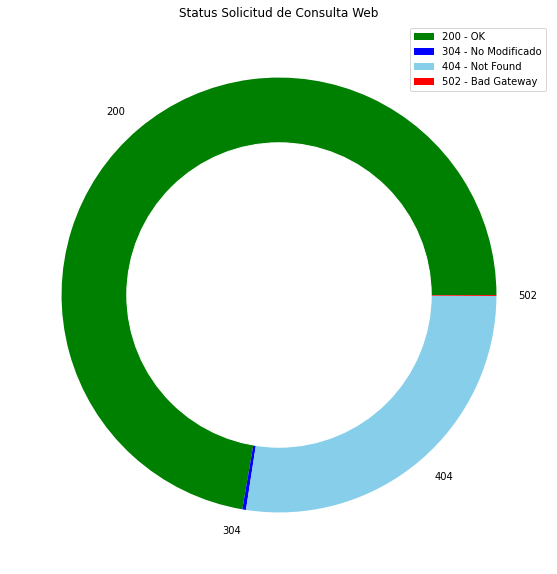

In [216]:
# 
import matplotlib.pyplot as plt
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(status_df["total"], labels=status_df["status"], colors=['green','blue','skyblue','red'])
p = plt.gcf()
p.gca().add_artist(my_circle)
fig = plt.gcf()
fig.set_size_inches(10,10)
labels = [r'200 - OK',r'304 - No Modificado',r'404 - Not Found', r'502 - Bad Gateway']
plt.legend(labels, loc="best")
plt.title("Status Solicitud de Consulta Web")
plt.show()


'status': Status de la solicitud. Los códigos encontrados en el data set son:
          200 - OK: indica que la solicitud ha sido procesada correctamente.
          404 - Not Found: significa que no fue posible encontrar los datos de la página web solicitada en el servidor.
          304 - No Modificado: comunica al navegador que los recursos almacenados (en caché) en el navegador no han sido                       modificados desde la última vez que visitó esa página.  
          502 - Bad Gateway: significa que un servidor en Internet recibió una respuesta no válida de otro servidor.  

In [306]:
new_geolog_df.browser.value_counts()

Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)                                                                                                                                2036
Mozilla/5.0 (compatible; spbot/4.0.7; +http://OpenLinkProfiler.org/bot )                                                                                                                                 494
Mozilla/5.0 (compatible; Baiduspider/2.0; +http://www.baidu.com/search/spider.html)                                                                                                                      169
Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm)                                                                                                                                  129
Mozilla/5.0 (compatible; AhrefsBot/5.0; +http://ahrefs.com/robot/)                                                                                                                  

La informacion del browser demuenstra Mozilla/5.0 en conjunto con la herramienta de búsqueda Goggle fue la forma más comun en las consultas.